# Master Thesis - H1 Analysis

## H1 = hypothesis 1, 7, 8 and 9

#### Hypothesis 1 = Unanticipated tightening monetary policy shock negativly impact excess stock returns for firms
#### Hypothesis 7 = Financial Sector firms exhibit higher sensitivity to monetary shocks
#### Hypothesis 8 = Energy Sector firms exhibit muted sensitivity to monetary shocks
#### Hypothesis 9 = Technology and growth oriented sectors exhibit higher sensitivity to monetary shocks

### Kristoffer Stjern & Daniel W. Kabré

# -----------------------------------------------------------------------------------------

# Chapter 0) Settings

## 0.1) Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
import statsmodels.api as sm
import warnings
from sklearn.preprocessing import LabelEncoder
from scipy import stats


warnings.simplefilter("ignore")

## 0.2) Parameters

## Chapter 1) Importing Data

In [56]:
df = pd.read_excel("Data/Finished Dataframes/H1_df.xlsx")
df.index = pd.to_datetime(df["Unnamed: 0"])
df.drop("Unnamed: 0",axis=1,inplace=True)
df.index.name = "Date"

In [57]:
control_variables = df.columns[16:]

In [58]:
df_b = df[df["Industry"].isin( ["Banks"])]

In [59]:
df = df[df["Industry"] != "Banks"]

## Chapter 2) Data Cleaning

### 2.1) Dropping NA

In [6]:
### BRW

df_cleaned_k1_brw = df.drop(["K2",	"K3",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k1_brw.dropna(subset=['K1'],inplace=True)

df_cleaned_k2_brw = df.drop(["K1",	"K3",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k2_brw.dropna(subset=['K2'],inplace=True)

df_cleaned_k3_brw = df.drop(["K1",	"K2",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k3_brw.dropna(subset=['K3'],inplace=True)

df_cleaned_k4_brw = df.drop(["K1",	"K2",	"K3"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k4_brw.dropna(subset=['K4'],inplace=True)

df_cleaned_k5_brw = df.drop(["K1",	"K2",	"K3"	,"K4",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k5_brw.dropna(subset=['K5'],inplace=True)

df_cleaned_k6_brw = df.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K7","FF4"],axis=1)
df_cleaned_k6_brw.dropna(subset=['K6'],inplace=True)

df_cleaned_k7_brw = df.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K6","FF4"],axis=1)
df_cleaned_k7_brw.dropna(subset=['K7'],inplace=True)

### FF4

df_cleaned_k1_ff4 = df.drop(["K2",	"K3",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k1_ff4.dropna(subset=['K1'],inplace=True)
df_cleaned_k1_ff4.dropna(subset=['FF4'],inplace=True)

df_cleaned_k2_ff4 = df.drop(["K1",	"K3",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k2_ff4.dropna(subset=['K2'],inplace=True)
df_cleaned_k2_ff4.dropna(subset=['FF4'],inplace=True)

df_cleaned_k3_ff4 = df.drop(["K1",	"K2",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k3_ff4.dropna(subset=['K3'],inplace=True)
df_cleaned_k3_ff4.dropna(subset=['FF4'],inplace=True)

df_cleaned_k4_ff4 = df.drop(["K1",	"K2",	"K3"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k4_ff4.dropna(subset=['K4'],inplace=True)
df_cleaned_k4_ff4.dropna(subset=['FF4'],inplace=True)

df_cleaned_k5_ff4 = df.drop(["K1",	"K2",	"K3"	,"K4",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k5_ff4.dropna(subset=['K5'],inplace=True)
df_cleaned_k5_ff4.dropna(subset=['FF4'],inplace=True)

df_cleaned_k6_ff4 = df.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K7","BRW"],axis=1)
df_cleaned_k6_ff4.dropna(subset=['K6'],inplace=True)
df_cleaned_k6_ff4.dropna(subset=['FF4'],inplace=True)

df_cleaned_k7_ff4 = df.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K6","BRW"],axis=1)
df_cleaned_k7_ff4.dropna(subset=['K7'],inplace=True)
df_cleaned_k7_ff4.dropna(subset=['FF4'],inplace=True)

### 2.2) Fill NA

In [7]:
df_cleaned_k1_brw.fillna(0,inplace=True)
df_cleaned_k2_brw.fillna(0,inplace=True)
df_cleaned_k3_brw.fillna(0,inplace=True)
df_cleaned_k4_brw.fillna(0,inplace=True)
df_cleaned_k5_brw.fillna(0,inplace=True)
df_cleaned_k6_brw.fillna(0,inplace=True)
df_cleaned_k7_brw.fillna(0,inplace=True)

df_cleaned_k1_ff4.fillna(0,inplace=True)
df_cleaned_k2_ff4.fillna(0,inplace=True)
df_cleaned_k3_ff4.fillna(0,inplace=True)
df_cleaned_k4_ff4.fillna(0,inplace=True)
df_cleaned_k5_ff4.fillna(0,inplace=True)
df_cleaned_k6_ff4.fillna(0,inplace=True)
df_cleaned_k7_ff4.fillna(0,inplace=True)

### 2.3) Dummy Variables 

### 2.4) Combining Variables BRW

In [8]:
Y1_brw  = df_cleaned_k1_brw["K1"]
x1_brw = df_cleaned_k1_brw.iloc[:,3:]
X1_brw = sm.add_constant(x1_brw)
X1_brw = pd.concat([X1_brw[["const", "BRW"]], X1_brw[control_variables]], axis=1)
X1_brw_nc = X1_brw[["const", "BRW"]]

Y2_brw  = df_cleaned_k2_brw["K2"]
x2_brw = df_cleaned_k2_brw.iloc[:,3:]
X2_brw = sm.add_constant(x2_brw)
X2_brw = pd.concat([X2_brw[["const", "BRW"]], X2_brw[control_variables]], axis=1)
X2_brw_nc = X2_brw[["const", "BRW"]]

Y3_brw  = df_cleaned_k3_brw["K3"]
x3_brw = df_cleaned_k3_brw.iloc[:,3:]
X3_brw = sm.add_constant(x3_brw)
X3_brw = pd.concat([X3_brw[["const", "BRW"]], X3_brw[control_variables]], axis=1)
X3_brw_nc = X3_brw[["const", "BRW"]]

Y4_brw  = df_cleaned_k4_brw["K4"]
x4_brw = df_cleaned_k4_brw.iloc[:,3:]
X4_brw = sm.add_constant(x4_brw)
X4_brw = pd.concat([X4_brw[["const", "BRW"]], X4_brw[control_variables]], axis=1)
X4_brw_nc = X4_brw[["const", "BRW"]]

Y5_brw  = df_cleaned_k5_brw["K5"]
x5_brw = df_cleaned_k5_brw.iloc[:,3:]
X5_brw = sm.add_constant(x5_brw)
X5_brw = pd.concat([X5_brw[["const", "BRW"]], X5_brw[control_variables]], axis=1)
X5_brw_nc = X5_brw[["const", "BRW"]]

Y6_brw  = df_cleaned_k6_brw["K6"]
x6_brw = df_cleaned_k6_brw.iloc[:,3:]
X6_brw = sm.add_constant(x6_brw)
X6_brw = pd.concat([X6_brw[["const", "BRW"]], X6_brw[control_variables]], axis=1)
X6_brw_nc = X6_brw[["const", "BRW"]]

Y7_brw  = df_cleaned_k7_brw["K7"]
x7_brw = df_cleaned_k7_brw.iloc[:,3:]
X7_brw = sm.add_constant(x7_brw)
X7_brw = pd.concat([X7_brw[["const", "BRW"]], X7_brw[control_variables]], axis=1)
X7_brw_nc = X7_brw[["const", "BRW"]]

X_brw_h1 = [X1_brw, X2_brw, X3_brw, X4_brw , X5_brw, X6_brw, X7_brw ]
X_brw_h1_nc = [X1_brw_nc, X2_brw_nc, X3_brw_nc, X4_brw_nc , X5_brw_nc, X6_brw_nc, X7_brw_nc ]
Y_brw_h1 = [Y1_brw, Y2_brw, Y3_brw, Y4_brw, Y5_brw, Y6_brw, Y7_brw]

### 2.4) Combining Variables FF4

In [9]:
Y1_ff4  = df_cleaned_k1_ff4["K1"]
x1_ff4 = df_cleaned_k1_ff4.iloc[:,3:]
X1_ff4 = sm.add_constant(x1_ff4)
X1_ff4 = pd.concat([X1_ff4[["const", "FF4"]], X1_ff4[control_variables]], axis=1)
X1_ff4_nc = X1_ff4[["const", "FF4"]]


Y2_ff4  = df_cleaned_k2_ff4["K2"]
x2_ff4 = df_cleaned_k2_ff4.iloc[:,3:]
X2_ff4 = sm.add_constant(x2_ff4)
X2_ff4 = pd.concat([X2_ff4[["const", "FF4"]], X2_ff4[control_variables]], axis=1)
X2_ff4_nc = X2_ff4[["const", "FF4"]]

Y3_ff4  = df_cleaned_k3_ff4["K3"]
x3_ff4 = df_cleaned_k3_ff4.iloc[:,3:]
X3_ff4 = sm.add_constant(x3_ff4)
X3_ff4 = pd.concat([X3_ff4[["const", "FF4"]], X3_ff4[control_variables]], axis=1)
X3_ff4_nc = X3_ff4[["const", "FF4"]]

Y4_ff4  = df_cleaned_k4_ff4["K4"]
x4_ff4 = df_cleaned_k4_ff4.iloc[:,3:]
X4_ff4 = sm.add_constant(x4_ff4)
X4_ff4 = pd.concat([X4_ff4[["const", "FF4"]], X4_ff4[control_variables]], axis=1)
X4_ff4_nc = X4_ff4[["const", "FF4"]]

Y5_ff4  = df_cleaned_k5_ff4["K5"]
x5_ff4 = df_cleaned_k5_ff4.iloc[:,3:]
X5_ff4 = sm.add_constant(x5_ff4)
X5_ff4 = pd.concat([X5_ff4[["const", "FF4"]], X5_ff4[control_variables]], axis=1)
X5_ff4_nc = X5_ff4[["const", "FF4"]]

Y6_ff4  = df_cleaned_k6_ff4["K6"]
x6_ff4 = df_cleaned_k6_ff4.iloc[:,3:]
X6_ff4 = sm.add_constant(x6_ff4)
X6_ff4 = pd.concat([X6_ff4[["const", "FF4"]], X6_ff4[control_variables]], axis=1)
X6_ff4_nc = X6_ff4[["const", "FF4"]]

Y7_ff4  = df_cleaned_k7_ff4["K7"]
x7_ff4 = df_cleaned_k7_ff4.iloc[:,3:]
X7_ff4 = sm.add_constant(x7_ff4)
X7_ff4 = pd.concat([X7_ff4[["const", "FF4"]], X7_ff4[control_variables]], axis=1)
X7_ff4_nc = X7_ff4[["const", "FF4"]]

X_ff4_h1 = [X1_ff4, X2_ff4, X3_ff4, X4_ff4 , X5_ff4, X6_ff4, X7_ff4 ]
X_ff4_h1_nc = [X1_ff4_nc, X2_ff4_nc, X3_ff4_nc, X4_ff4_nc , X5_ff4_nc, X6_ff4_nc, X7_ff4_nc ]
Y_ff4_h1 = [Y1_ff4, Y2_ff4, Y3_ff4, Y4_ff4, Y5_ff4, Y6_ff4, Y7_ff4]

## Chapter 3) Regression Analysis

### 3.1) Hypothesis 1

### BRW

In [10]:
H1_BRW_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H1_BRW_result_df_c.index = ["Coeff", "95% conf Interval"]
H1_BRW_result_df_c

H1_BRW_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H1_BRW_result_df_nc.index = ["Coeff", "95% conf Interval"]
H1_BRW_result_df_nc

,K1,K2,K3,K4,K5,K6,K7
Coeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95% conf Interval,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
alpha = 0.05

for i in range(len(X_brw_h1)):
    X = X_brw_h1[i]
    Y = Y_brw_h1[i]
 
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value

    ci = t_crit * se
    
    H1_BRW_result_df_c.iloc[0,i] = coef
    H1_BRW_result_df_c.iloc[1,i] = ci
  

alpha = 0.05

for i in range(len(X_brw_h1_nc)):
    X = X_brw_h1_nc[i]
    Y = Y_brw_h1[i]
    N = len(Y)
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value

    ci = t_crit * se
    
    H1_BRW_result_df_nc.iloc[0,i] = coef
    H1_BRW_result_df_nc.iloc[1,i] = ci




### FF4

In [12]:
H1_FF4_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H1_FF4_result_df_c.index = ["Coeff", "95% conf Interval"]
H1_FF4_result_df_c

H1_FF4_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H1_FF4_result_df_nc.index = ["Coeff", "95% conf Interval"]
H1_FF4_result_df_nc

,K1,K2,K3,K4,K5,K6,K7
Coeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95% conf Interval,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
for i in range(len(X_ff4_h1)):
    X = X_ff4_h1[i]
    Y = Y_ff4_h1[i]
    
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value


    ci= t_crit * se
    
    H1_FF4_result_df_c.iloc[0,i] = coef
    H1_FF4_result_df_c.iloc[1,i] = ci

for i in range(len(X_ff4_h1_nc)):
    X = X_ff4_h1_nc[i]
    Y = Y_ff4_h1[i]
    
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value


    ci= t_crit * se
    
    H1_FF4_result_df_nc.iloc[0,i] = coef
    H1_FF4_result_df_nc.iloc[1,i] = ci
   

### Plotting Results with controll Variables

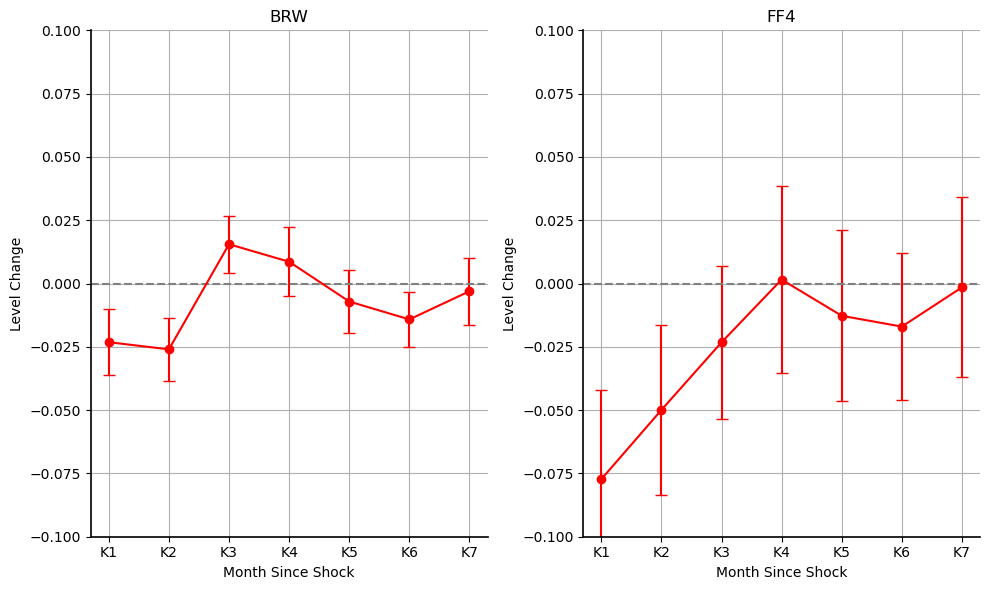

In [14]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(H1_BRW_result_df_c.columns, H1_BRW_result_df_c.loc["Coeff"], yerr=H1_BRW_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("BRW")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.1,0.1) 

# Plot for Old Firms
axes[1].errorbar(H1_FF4_result_df_c.columns, H1_FF4_result_df_c.loc["Coeff"], yerr=H1_FF4_result_df_c.loc["95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("FF4")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.1,0.1) 

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)


plt.tight_layout()
plt.show()


### Plotting Results without controll Variables

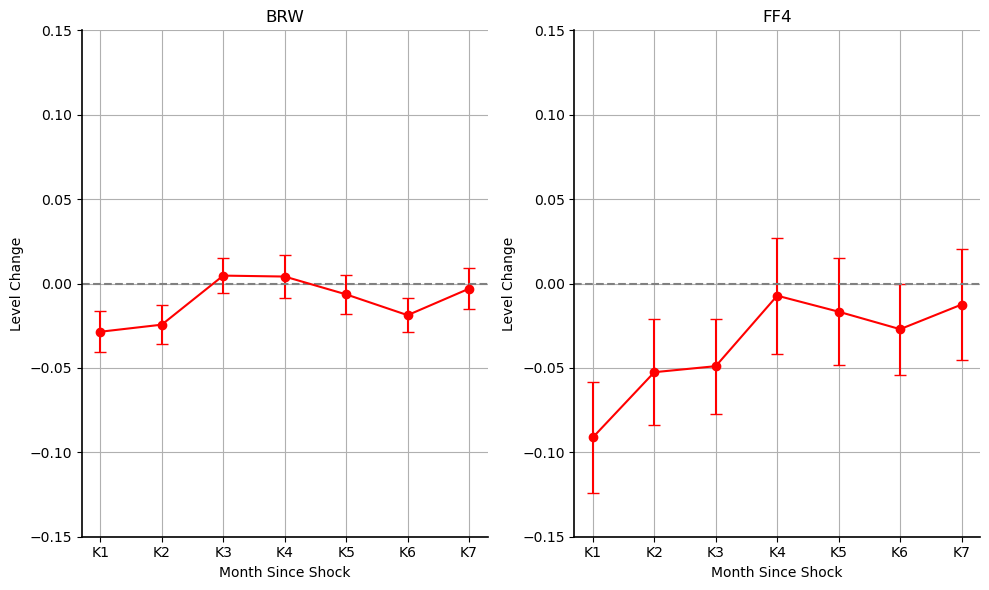

In [15]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(H1_BRW_result_df_nc.columns, H1_BRW_result_df_nc.loc["Coeff"], yerr=H1_BRW_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("BRW")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.15,0.15) 

# Plot for Old Firms
axes[1].errorbar(H1_FF4_result_df_nc.columns, H1_FF4_result_df_nc.loc["Coeff"], yerr=H1_FF4_result_df_nc.loc["95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("FF4")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.15,0.15)

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)


plt.tight_layout()
plt.savefig("Data/Pictures/H1_nc.png")
plt.show()


### 3.2) Hypothesis 8

#### Isolating Oil and Gas Firms

In [16]:
df_OG_brw_k1 = df_cleaned_k1_brw.loc[df_cleaned_k1_brw["Industry"].isin(["Energy"])]
df_OG_brw_k2 = df_cleaned_k2_brw.loc[df_cleaned_k2_brw["Industry"].isin(["Energy"])]
df_OG_brw_k3 = df_cleaned_k3_brw.loc[df_cleaned_k3_brw["Industry"].isin(["Energy"])]
df_OG_brw_k4 = df_cleaned_k4_brw.loc[df_cleaned_k4_brw["Industry"].isin(["Energy"])]
df_OG_brw_k5 = df_cleaned_k5_brw.loc[df_cleaned_k5_brw["Industry"].isin(["Energy"])]
df_OG_brw_k6 = df_cleaned_k6_brw.loc[df_cleaned_k6_brw["Industry"].isin(["Energy"])]
df_OG_brw_k7 = df_cleaned_k7_brw.loc[df_cleaned_k7_brw["Industry"].isin(["Energy"])]


df_OG_ff4_k1 = df_cleaned_k1_ff4.loc[df_cleaned_k1_ff4["Industry"].isin(["Energy"])]
df_OG_ff4_k2 = df_cleaned_k2_ff4.loc[df_cleaned_k2_ff4["Industry"].isin(["Energy"])]
df_OG_ff4_k3 = df_cleaned_k3_ff4.loc[df_cleaned_k3_ff4["Industry"].isin(["Energy"])]
df_OG_ff4_k4 = df_cleaned_k4_ff4.loc[df_cleaned_k4_ff4["Industry"].isin(["Energy"])]
df_OG_ff4_k5 = df_cleaned_k5_ff4.loc[df_cleaned_k5_ff4["Industry"].isin(["Energy"])]
df_OG_ff4_k6 = df_cleaned_k6_ff4.loc[df_cleaned_k6_ff4["Industry"].isin(["Energy"])]
df_OG_ff4_k7 = df_cleaned_k7_ff4.loc[df_cleaned_k7_ff4["Industry"].isin(["Energy"])]


#### Identifying Variables - BRW

In [17]:
Y1_brw_OG  = df_OG_brw_k1["K1"]
x1_brw_OG = sm.add_constant(df_OG_brw_k1)
X1_brw_OG = pd.concat([x1_brw_OG[["const", "BRW"]], x1_brw_OG[control_variables]], axis=1)
X1_brw_OG_nc = x1_brw_OG[["const", "BRW"]]

Y2_brw_OG  = df_OG_brw_k2["K2"]
x2_brw_OG = sm.add_constant(df_OG_brw_k2)
X2_brw_OG = pd.concat([x2_brw_OG[["const", "BRW"]], x2_brw_OG[control_variables]], axis=1)
X2_brw_OG_nc = x2_brw_OG[["const", "BRW"]]

Y3_brw_OG  = df_OG_brw_k3["K3"]
x3_brw_OG = sm.add_constant(df_OG_brw_k3)
X3_brw_OG = pd.concat([x3_brw_OG[["const", "BRW"]], x3_brw_OG[control_variables]], axis=1)
X3_brw_OG_nc = x3_brw_OG[["const", "BRW"]]

Y4_brw_OG  = df_OG_brw_k4["K4"]
x4_brw_OG = sm.add_constant(df_OG_brw_k4)
X4_brw_OG = pd.concat([x4_brw_OG[["const", "BRW"]], x4_brw_OG[control_variables]], axis=1)
X4_brw_OG_nc = x4_brw_OG[["const", "BRW"]]

Y5_brw_OG  = df_OG_brw_k5["K5"]
x5_brw_OG = sm.add_constant(df_OG_brw_k5)
X5_brw_OG = pd.concat([x5_brw_OG[["const", "BRW"]], x5_brw_OG[control_variables]], axis=1)
X5_brw_OG_nc = x5_brw_OG[["const", "BRW"]]

Y6_brw_OG  = df_OG_brw_k6["K6"]
x6_brw_OG = sm.add_constant(df_OG_brw_k6)
X6_brw_OG = pd.concat([x6_brw_OG[["const", "BRW"]], x6_brw_OG[control_variables]], axis=1)
X6_brw_OG_nc = x6_brw_OG[["const", "BRW"]]

Y7_brw_OG  = df_OG_brw_k7["K7"]
x7_brw_OG = sm.add_constant(df_OG_brw_k7)
X7_brw_OG = pd.concat([x7_brw_OG[["const", "BRW"]], x7_brw_OG[control_variables]], axis=1)
X7_brw_OG_nc = x7_brw_OG[["const", "BRW"]]

X_brw_h8 = [X1_brw_OG, X2_brw_OG, X3_brw_OG, X4_brw_OG , X5_brw_OG, X6_brw_OG, X7_brw_OG ]
X_brw_h8_nc = [X1_brw_OG_nc, X2_brw_OG_nc, X3_brw_OG_nc, X4_brw_OG_nc , X5_brw_OG_nc, X6_brw_OG_nc, X7_brw_OG_nc ]
Y_brw_h8 = [Y1_brw_OG, Y2_brw_OG, Y3_brw_OG, Y4_brw_OG, Y5_brw_OG, Y6_brw_OG, Y7_brw_OG]

#### Identifying Variables - FF4

In [18]:
Y1_ff4_OG  = df_OG_ff4_k1["K1"]
x1_ff4_OG = sm.add_constant(df_OG_ff4_k1)
X1_ff4_OG = pd.concat([x1_ff4_OG[["const", "FF4"]], x1_ff4_OG[control_variables]], axis=1)
X1_ff4_OG_nc = x1_ff4_OG[["const", "FF4"]]

Y2_ff4_OG  = df_OG_ff4_k2["K2"]
x2_ff4_OG = sm.add_constant(df_OG_ff4_k2)
X2_ff4_OG = pd.concat([x2_ff4_OG[["const", "FF4"]], x2_ff4_OG[control_variables]], axis=1)
X2_ff4_OG_nc = x2_ff4_OG[["const", "FF4"]]

Y3_ff4_OG  = df_OG_ff4_k3["K3"]
x3_ff4_OG = sm.add_constant(df_OG_ff4_k3)
X3_ff4_OG = pd.concat([x3_ff4_OG[["const", "FF4"]], x3_ff4_OG[control_variables]], axis=1)
X3_ff4_OG_nc = x3_ff4_OG[["const", "FF4"]]

Y4_ff4_OG  = df_OG_ff4_k4["K4"]
x4_ff4_OG = sm.add_constant(df_OG_ff4_k4)
X4_ff4_OG = pd.concat([x4_ff4_OG[["const", "FF4"]], x4_ff4_OG[control_variables]], axis=1)
X4_ff4_OG_nc = x4_ff4_OG[["const", "FF4"]]

Y5_ff4_OG  = df_OG_ff4_k5["K5"]
x5_ff4_OG = sm.add_constant(df_OG_ff4_k5)
X5_ff4_OG = pd.concat([x5_ff4_OG[["const", "FF4"]], x5_ff4_OG[control_variables]], axis=1)
X5_ff4_OG_nc = x5_ff4_OG[["const", "FF4"]]

Y6_ff4_OG  = df_OG_ff4_k6["K6"]
x6_ff4_OG = sm.add_constant(df_OG_ff4_k6)
X6_ff4_OG = pd.concat([x6_ff4_OG[["const", "FF4"]], x6_ff4_OG[control_variables]], axis=1)
X6_ff4_OG_nc = x6_ff4_OG[["const", "FF4"]]

Y7_ff4_OG  = df_OG_ff4_k7["K7"]
x7_ff4_OG = sm.add_constant(df_OG_ff4_k7)
X7_ff4_OG = pd.concat([x7_ff4_OG[["const", "FF4"]], x7_ff4_OG[control_variables]], axis=1)
X7_ff4_OG_nc = x7_ff4_OG[["const", "FF4"]]

X_ff4_h8 = [X1_ff4_OG, X2_ff4_OG, X3_ff4_OG, X4_ff4_OG , X5_ff4_OG, X6_ff4_OG, X7_ff4_OG ]
X_ff4_h8_nc = [X1_ff4_OG_nc, X2_ff4_OG_nc, X3_ff4_OG_nc, X4_ff4_OG_nc , X5_ff4_OG_nc, X6_ff4_OG_nc, X7_ff4_OG_nc ]
Y_ff4_h8 = [Y1_ff4_OG, Y2_ff4_OG, Y3_ff4_OG, Y4_ff4_OG, Y5_ff4_OG, Y6_ff4_OG, Y7_ff4_OG]

### Analysis - BRW

In [19]:
H8_BRW_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H8_BRW_result_df_c.index = ["Coeff", "95% conf Interval"]
H8_BRW_result_df_c

H8_BRW_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H8_BRW_result_df_nc.index = ["Coeff", "95% conf Interval"]
H8_BRW_result_df_nc

,K1,K2,K3,K4,K5,K6,K7
Coeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95% conf Interval,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
for i in range(len(X_brw_h8)):
    X = X_brw_h8[i]
    Y = Y_brw_h8[i]
 
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value

    ci = t_crit * se
    
    H8_BRW_result_df_c.iloc[0,i] = coef
    H8_BRW_result_df_c.iloc[1,i] = ci

for i in range(len(X_brw_h8_nc)):
    X = X_brw_h8_nc[i]
    Y = Y_brw_h8[i]
 
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value

    ci = t_crit * se
    
    H8_BRW_result_df_nc.iloc[0,i] = coef
    H8_BRW_result_df_nc.iloc[1,i] = ci






### FF4

In [21]:
H8_FF4_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H8_FF4_result_df_c.index = ["Coeff", "95% conf Interval"]
H8_FF4_result_df_c

H8_FF4_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H8_FF4_result_df_nc.index = ["Coeff", "95% conf Interval"]
H8_FF4_result_df_nc

,K1,K2,K3,K4,K5,K6,K7
Coeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95% conf Interval,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
for i in range(len(X_ff4_h8)):
    X = X_ff4_h8[i]
    Y = Y_ff4_h8[i]
  
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value


    ci= t_crit * se
    
    H8_FF4_result_df_c.iloc[0,i] = coef
    H8_FF4_result_df_c.iloc[1,i] = ci


for i in range(len(X_ff4_h8_nc)):
    X = X_ff4_h8_nc[i]
    Y = Y_ff4_h8[i]
  
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value


    ci= t_crit * se
    
    H8_FF4_result_df_nc.iloc[0,i] = coef
    H8_FF4_result_df_nc.iloc[1,i] = ci
   

### Plotting Results with controll variables

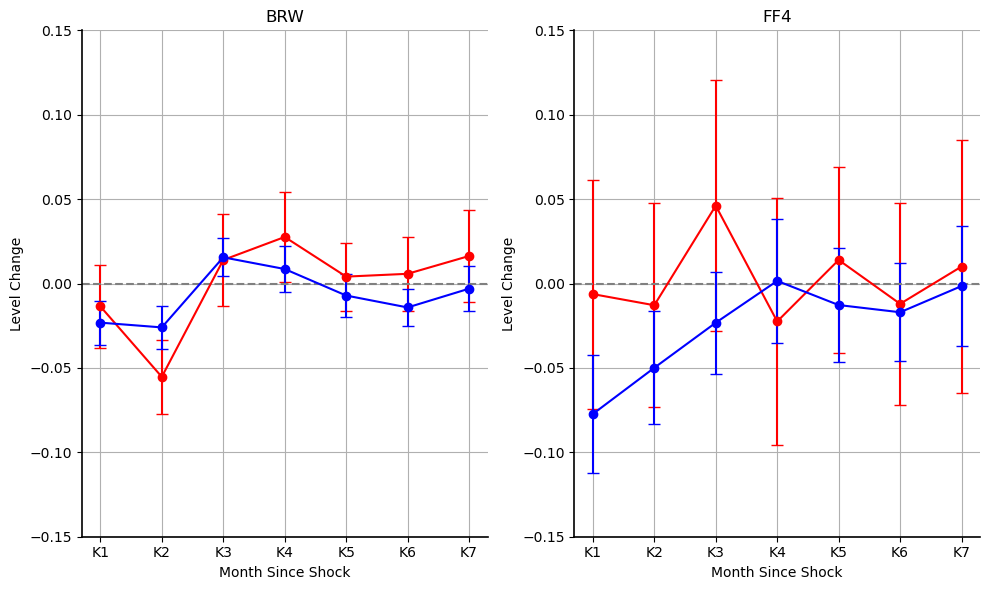

In [23]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(H8_BRW_result_df_c.columns, H8_BRW_result_df_c.loc["Coeff"], yerr=H8_BRW_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].errorbar(H1_BRW_result_df_c.columns, H1_BRW_result_df_c.loc["Coeff"], yerr=H1_BRW_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("BRW")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.15,0.15)

# Plot for Old Firms
axes[1].errorbar(H8_FF4_result_df_c.columns, H8_FF4_result_df_c.loc["Coeff"], yerr=H8_FF4_result_df_c.loc["95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[1].errorbar(H1_FF4_result_df_c.columns, H1_FF4_result_df_c.loc["Coeff"], yerr=H1_FF4_result_df_c.loc["95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("FF4")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.15,0.15)

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)



plt.tight_layout()
plt.show()


### Plotting Results without controll variables

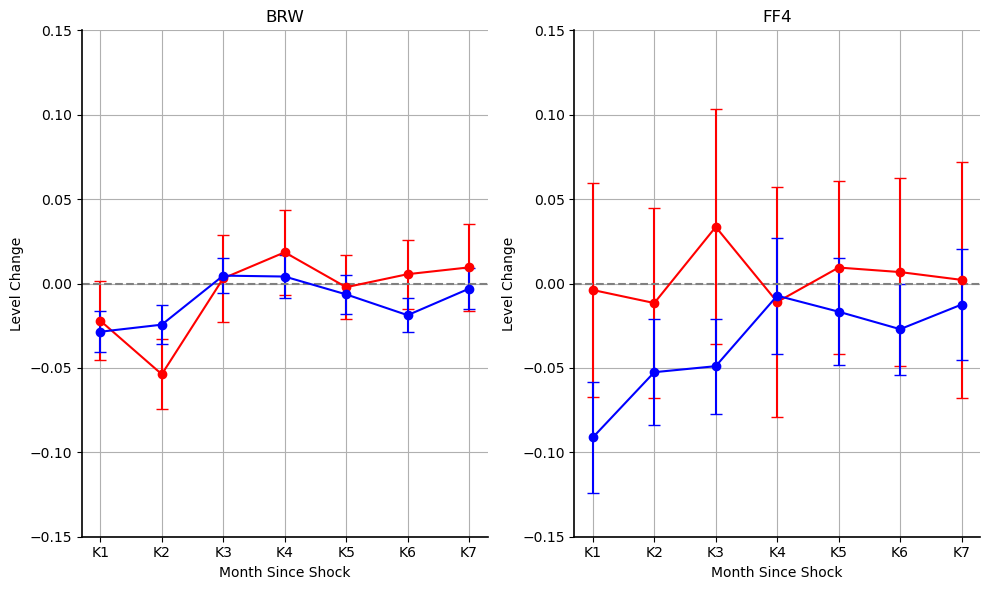

In [24]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(H8_BRW_result_df_nc.columns, H8_BRW_result_df_nc.loc["Coeff"], yerr=H8_BRW_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].errorbar(H1_BRW_result_df_nc.columns, H1_BRW_result_df_nc.loc["Coeff"], yerr=H1_BRW_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("BRW")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.15,0.15) 

# Plot for Old Firms
axes[1].errorbar(H8_FF4_result_df_nc.columns, H8_FF4_result_df_nc.loc["Coeff"], yerr=H8_FF4_result_df_nc.loc["95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[1].errorbar(H1_FF4_result_df_nc.columns, H1_FF4_result_df_nc.loc["Coeff"], yerr=H1_FF4_result_df_nc.loc["95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("FF4")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.15,0.15)

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)



plt.tight_layout()
plt.savefig("Data/Pictures/H8_nc.png")
plt.show()


### 3.3) Hypothesis 7

In [60]:
### BRW

df_cleaned_k1_brw_b = df_b.drop(["K2",	"K3",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k1_brw_b.dropna(subset=['K1'],inplace=True)

df_cleaned_k2_brw_b = df_b.drop(["K1",	"K3",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k2_brw_b.dropna(subset=['K2'],inplace=True)

df_cleaned_k3_brw_b = df_b.drop(["K1",	"K2",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k3_brw_b.dropna(subset=['K3'],inplace=True)

df_cleaned_k4_brw_b = df_b.drop(["K1",	"K2",	"K3"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k4_brw_b.dropna(subset=['K4'],inplace=True)

df_cleaned_k5_brw_b = df_b.drop(["K1",	"K2",	"K3"	,"K4",	"K6",	"K7","FF4"],axis=1)
df_cleaned_k5_brw_b.dropna(subset=['K5'],inplace=True)

df_cleaned_k6_brw_b = df_b.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K7","FF4"],axis=1)
df_cleaned_k6_brw_b.dropna(subset=['K6'],inplace=True)

df_cleaned_k7_brw_b = df_b.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K6","FF4"],axis=1)
df_cleaned_k7_brw_b.dropna(subset=['K7'],inplace=True)

### FF4

df_cleaned_k1_ff4_b = df_b.drop(["K2",	"K3",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k1_ff4_b.dropna(subset=['K1'],inplace=True)
df_cleaned_k1_ff4_b.dropna(subset=['FF4'],inplace=True)

df_cleaned_k2_ff4_b = df_b.drop(["K1",	"K3",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k2_ff4_b.dropna(subset=['K2'],inplace=True)
df_cleaned_k2_ff4_b.dropna(subset=['FF4'],inplace=True)

df_cleaned_k3_ff4_b = df_b.drop(["K1",	"K2",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k3_ff4_b.dropna(subset=['K3'],inplace=True)
df_cleaned_k3_ff4_b.dropna(subset=['FF4'],inplace=True)

df_cleaned_k4_ff4_b = df_b.drop(["K1",	"K2",	"K3"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k4_ff4_b.dropna(subset=['K4'],inplace=True)
df_cleaned_k4_ff4_b.dropna(subset=['FF4'],inplace=True)

df_cleaned_k5_ff4_b = df_b.drop(["K1",	"K2",	"K3"	,"K4",	"K6",	"K7","BRW"],axis=1)
df_cleaned_k5_ff4_b.dropna(subset=['K5'],inplace=True)
df_cleaned_k5_ff4_b.dropna(subset=['FF4'],inplace=True)

df_cleaned_k6_ff4_b = df_b.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K7","BRW"],axis=1)
df_cleaned_k6_ff4_b.dropna(subset=['K6'],inplace=True)
df_cleaned_k6_ff4_b.dropna(subset=['FF4'],inplace=True)

df_cleaned_k7_ff4_b = df_b.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K6","BRW"],axis=1)
df_cleaned_k7_ff4_b.dropna(subset=['K7'],inplace=True)
df_cleaned_k7_ff4_b.dropna(subset=['FF4'],inplace=True)

### 2.2) Fill NA

In [61]:
df_cleaned_k1_brw_b.fillna(0,inplace=True)
df_cleaned_k2_brw_b.fillna(0,inplace=True)
df_cleaned_k3_brw_b.fillna(0,inplace=True)
df_cleaned_k4_brw_b.fillna(0,inplace=True)
df_cleaned_k5_brw_b.fillna(0,inplace=True)
df_cleaned_k6_brw_b.fillna(0,inplace=True)
df_cleaned_k7_brw_b.fillna(0,inplace=True)

df_cleaned_k1_ff4_b.fillna(0,inplace=True)
df_cleaned_k2_ff4_b.fillna(0,inplace=True)
df_cleaned_k3_ff4_b.fillna(0,inplace=True)
df_cleaned_k4_ff4_b.fillna(0,inplace=True)
df_cleaned_k5_ff4_b.fillna(0,inplace=True)
df_cleaned_k6_ff4_b.fillna(0,inplace=True)
df_cleaned_k7_ff4_b.fillna(0,inplace=True)

#### Isolating Financial Firms

In [62]:
df_FIN_brw_k1 = df_cleaned_k1_brw_b
df_FIN_brw_k2 = df_cleaned_k2_brw_b
df_FIN_brw_k3 = df_cleaned_k3_brw_b
df_FIN_brw_k4 = df_cleaned_k4_brw_b
df_FIN_brw_k5 = df_cleaned_k5_brw_b
df_FIN_brw_k6 = df_cleaned_k6_brw_b
df_FIN_brw_k7 = df_cleaned_k7_brw_b


df_FIN_ff4_k1 = df_cleaned_k1_ff4_b
df_FIN_ff4_k2 = df_cleaned_k2_ff4_b
df_FIN_ff4_k3 = df_cleaned_k3_ff4_b
df_FIN_ff4_k4 = df_cleaned_k4_ff4_b
df_FIN_ff4_k5 = df_cleaned_k5_ff4_b
df_FIN_ff4_k6 = df_cleaned_k6_ff4_b
df_FIN_ff4_k7 = df_cleaned_k7_ff4_b


#### Identifying Variables - BRW

In [63]:
Y1_brw_FIN  = df_FIN_brw_k1["K1"]
x1_brw_FIN = sm.add_constant(df_FIN_brw_k1)
X1_brw_FIN = pd.concat([x1_brw_FIN[["const", "BRW"]], x1_brw_FIN[control_variables]], axis=1)
X1_brw_FIN_nc = x1_brw_FIN[["const", "BRW"]]

Y2_brw_FIN  = df_FIN_brw_k2["K2"]
x2_brw_FIN = sm.add_constant(df_FIN_brw_k2)
X2_brw_FIN = pd.concat([x2_brw_FIN[["const", "BRW"]], x2_brw_FIN[control_variables]], axis=1)
X2_brw_FIN_nc = x2_brw_FIN[["const", "BRW"]]

Y3_brw_FIN  = df_FIN_brw_k3["K3"]
x3_brw_FIN = sm.add_constant(df_FIN_brw_k3)
X3_brw_FIN = pd.concat([x3_brw_FIN[["const", "BRW"]], x3_brw_FIN[control_variables]], axis=1)
X3_brw_FIN_nc = x3_brw_FIN[["const", "BRW"]]

Y4_brw_FIN  = df_FIN_brw_k4["K4"]
x4_brw_FIN = sm.add_constant(df_FIN_brw_k4)
X4_brw_FIN = pd.concat([x4_brw_FIN[["const", "BRW"]], x4_brw_FIN[control_variables]], axis=1)
X4_brw_FIN_nc = x4_brw_FIN[["const", "BRW"]]

Y5_brw_FIN  = df_FIN_brw_k5["K5"]
x5_brw_FIN = sm.add_constant(df_FIN_brw_k5)
X5_brw_FIN = pd.concat([x5_brw_FIN[["const", "BRW"]], x5_brw_FIN[control_variables]], axis=1)
X5_brw_FIN_nc = x5_brw_FIN[["const", "BRW"]]

Y6_brw_FIN  = df_FIN_brw_k6["K6"]
x6_brw_FIN = sm.add_constant(df_FIN_brw_k6)
X6_brw_FIN = pd.concat([x6_brw_FIN[["const", "BRW"]], x6_brw_FIN[control_variables]], axis=1)
X6_brw_FIN_nc = x6_brw_FIN[["const", "BRW"]]

Y7_brw_FIN  = df_FIN_brw_k7["K7"]
x7_brw_FIN = sm.add_constant(df_FIN_brw_k7)
X7_brw_FIN = pd.concat([x7_brw_FIN[["const", "BRW"]], x7_brw_FIN[control_variables]], axis=1)
X7_brw_FIN_nc = x7_brw_FIN[["const", "BRW"]]

X_brw_h7 = [X1_brw_FIN, X2_brw_FIN, X3_brw_FIN, X4_brw_FIN , X5_brw_FIN, X6_brw_FIN, X7_brw_FIN ]
X_brw_h7_nc = [X1_brw_FIN_nc, X2_brw_FIN_nc, X3_brw_FIN_nc, X4_brw_FIN_nc , X5_brw_FIN_nc, X6_brw_FIN_nc, X7_brw_FIN_nc ]
Y_brw_h7 = [Y1_brw_FIN, Y2_brw_FIN, Y3_brw_FIN, Y4_brw_FIN, Y5_brw_FIN, Y6_brw_FIN, Y7_brw_FIN]

#### Identifying Variables - FF4

In [64]:
Y1_ff4_FIN  = df_FIN_ff4_k1["K1"]
x1_ff4_FIN = sm.add_constant(df_FIN_ff4_k1)
X1_ff4_FIN = pd.concat([x1_ff4_FIN[["const", "FF4"]], x1_ff4_FIN[control_variables]], axis=1)
X1_ff4_FIN_nc = x1_ff4_FIN[["const", "FF4"]]

Y2_ff4_FIN  = df_FIN_ff4_k2["K2"]
x2_ff4_FIN = sm.add_constant(df_FIN_ff4_k2)
X2_ff4_FIN = pd.concat([x2_ff4_FIN[["const", "FF4"]], x2_ff4_FIN[control_variables]], axis=1)
X2_ff4_FIN_nc = x2_ff4_FIN[["const", "FF4"]]

Y3_ff4_FIN  = df_FIN_ff4_k3["K3"]
x3_ff4_FIN = sm.add_constant(df_FIN_ff4_k3)
X3_ff4_FIN = pd.concat([x3_ff4_FIN[["const", "FF4"]], x3_ff4_FIN[control_variables]], axis=1)
X3_ff4_FIN_nc = x3_ff4_FIN[["const", "FF4"]]

Y4_ff4_FIN  = df_FIN_ff4_k4["K4"]
x4_ff4_FIN = sm.add_constant(df_FIN_ff4_k4)
X4_ff4_FIN = pd.concat([x4_ff4_FIN[["const", "FF4"]], x4_ff4_FIN[control_variables]], axis=1)
X4_ff4_FIN_nc = x4_ff4_FIN[["const", "FF4"]]

Y5_ff4_FIN  = df_FIN_ff4_k5["K5"]
x5_ff4_FIN = sm.add_constant(df_FIN_ff4_k5)
X5_ff4_FIN = pd.concat([x5_ff4_FIN[["const", "FF4"]], x5_ff4_FIN[control_variables]], axis=1)
X5_ff4_FIN_nc = x5_ff4_FIN[["const", "FF4"]]

Y6_ff4_FIN  = df_FIN_ff4_k6["K6"]
x6_ff4_FIN = sm.add_constant(df_FIN_ff4_k6)
X6_ff4_FIN = pd.concat([x6_ff4_FIN[["const", "FF4"]], x6_ff4_FIN[control_variables]], axis=1)
X6_ff4_FIN_nc = x6_ff4_FIN[["const", "FF4"]]

Y7_ff4_FIN  = df_FIN_ff4_k7["K7"]
x7_ff4_FIN = sm.add_constant(df_FIN_ff4_k7)
X7_ff4_FIN = pd.concat([x7_ff4_FIN[["const", "FF4"]], x7_ff4_FIN[control_variables]], axis=1)
X7_ff4_FIN_nc = x7_ff4_FIN[["const", "FF4"]]

X_ff4_h7 = [X1_ff4_FIN, X2_ff4_FIN, X3_ff4_FIN, X4_ff4_FIN , X5_ff4_FIN, X6_ff4_FIN, X7_ff4_FIN ]
X_ff4_h7_nc = [X1_ff4_FIN_nc, X2_ff4_FIN_nc, X3_ff4_FIN_nc, X4_ff4_FIN_nc , X5_ff4_FIN_nc, X6_ff4_FIN_nc, X7_ff4_FIN_nc ]
Y_ff4_h7 = [Y1_ff4_FIN, Y2_ff4_FIN, Y3_ff4_FIN, Y4_ff4_FIN, Y5_ff4_FIN, Y6_ff4_FIN, Y7_ff4_FIN]

### Analysis - BRW

In [65]:
H7_BRW_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H7_BRW_result_df_c.index = ["Coeff", "95% conf Interval"]
H7_BRW_result_df_c

H7_BRW_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H7_BRW_result_df_nc.index = ["Coeff", "95% conf Interval"]
H7_BRW_result_df_nc

,K1,K2,K3,K4,K5,K6,K7
Coeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95% conf Interval,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
for i in range(len(X_brw_h7)):
    X = X_brw_h7[i]
    Y = Y_brw_h7[i]
 
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value

    ci = t_crit * se
    
    H7_BRW_result_df_c.iloc[0,i] = coef
    H7_BRW_result_df_c.iloc[1,i] = ci

for i in range(len(X_brw_h7_nc)):
    X = X_brw_h7_nc[i]
    Y = Y_brw_h7[i]
 
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value

    ci = t_crit * se
    
    H7_BRW_result_df_nc.iloc[0,i] = coef
    H7_BRW_result_df_nc.iloc[1,i] = ci
  






### FF4

In [67]:
H7_FF4_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H7_FF4_result_df_c.index = ["Coeff", "95% conf Interval"]
H7_FF4_result_df_c

H7_FF4_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H7_FF4_result_df_nc.index = ["Coeff", "95% conf Interval"]
H7_FF4_result_df_nc

,K1,K2,K3,K4,K5,K6,K7
Coeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95% conf Interval,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
for i in range(len(X_ff4_h7)):
    X = X_ff4_h7[i]
    Y = Y_ff4_h7[i]
  
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value


    ci= t_crit * se
    
    H7_FF4_result_df_c.iloc[0,i] = coef
    H7_FF4_result_df_c.iloc[1,i] = ci

for i in range(len(X_ff4_h7_nc)):
    X = X_ff4_h7_nc[i]
    Y = Y_ff4_h7[i]
  
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value


    ci= t_crit * se
    
    H7_FF4_result_df_nc.iloc[0,i] = coef
    H7_FF4_result_df_nc.iloc[1,i] = ci
   

In [69]:
H7_FF4_result_df_nc
H7_BRW_result_df_nc

,K1,K2,K3,K4,K5,K6,K7
Coeff,0.024358,-0.016202,0.000151,-0.018239,-0.013125,-0.013534,-0.004176
95% conf Interval,0.011329,0.011899,0.011004,0.012318,0.011433,0.011649,0.012107


### Plotting Results with control variables

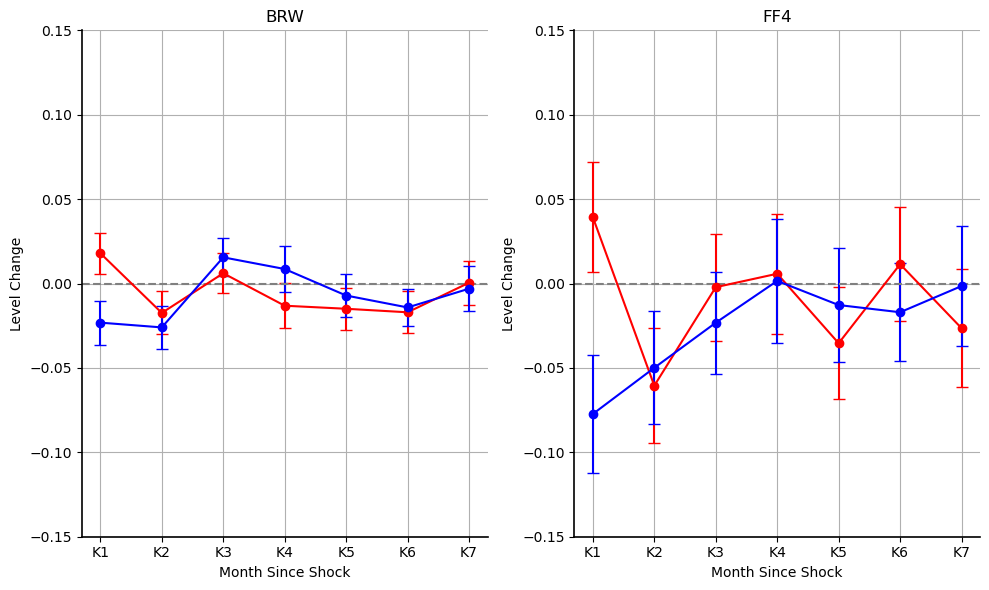

In [70]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(H7_BRW_result_df_c.columns, H7_BRW_result_df_c.loc["Coeff"], yerr=H7_BRW_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].errorbar(H1_BRW_result_df_c.columns, H1_BRW_result_df_c.loc["Coeff"], yerr=H1_BRW_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("BRW")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.15,0.15)

# Plot for Old Firms
axes[1].errorbar(H7_FF4_result_df_c.columns, H7_FF4_result_df_c.loc["Coeff"], yerr=H7_FF4_result_df_c.loc["95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[1].errorbar(H1_FF4_result_df_c.columns, H1_FF4_result_df_c.loc["Coeff"], yerr=H1_FF4_result_df_c.loc["95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("FF4")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.15,0.15)

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)


plt.tight_layout()
plt.show()


### Plotting Results without control variables

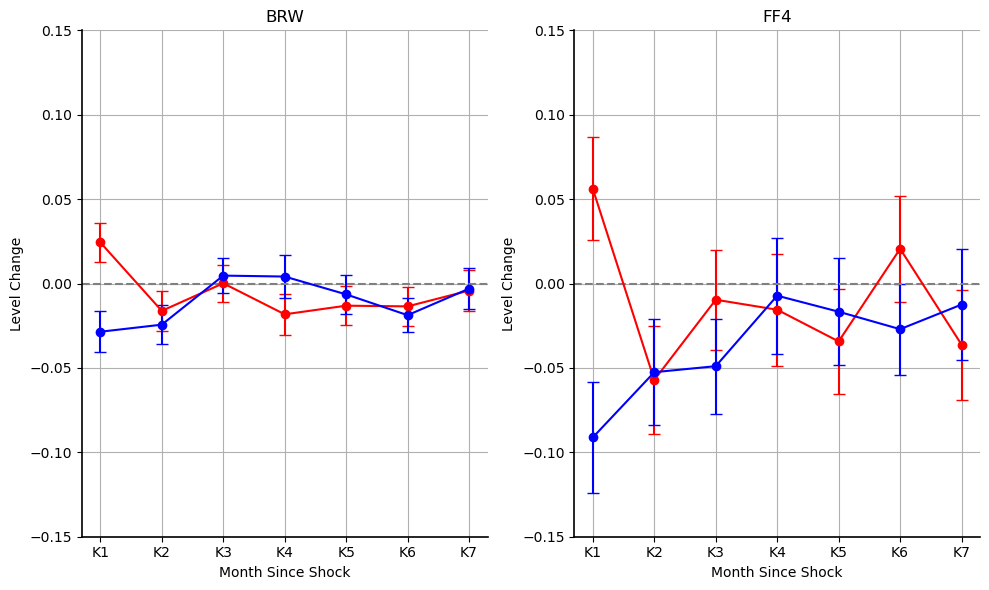

In [71]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(H7_BRW_result_df_nc.columns, H7_BRW_result_df_nc.loc["Coeff"], yerr=H7_BRW_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].errorbar(H1_BRW_result_df_nc.columns, H1_BRW_result_df_nc.loc["Coeff"], yerr=H1_BRW_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("BRW")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.15,0.15) 

# Plot for Old Firms
axes[1].errorbar(H7_FF4_result_df_nc.columns, H7_FF4_result_df_nc.loc["Coeff"], yerr=H7_FF4_result_df_nc.loc["95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[1].errorbar(H1_FF4_result_df_nc.columns, H1_FF4_result_df_nc.loc["Coeff"], yerr=H1_FF4_result_df_nc.loc["95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("FF4")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.15,0.15)
# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)


plt.tight_layout()
plt.savefig("Data/Pictures/H7_nc.png")
plt.show()


### 3.4) Hypothesis 9

#### Isolating Technology and growth-oriented Firms

In [37]:
df_TG_brw_k1 = df_cleaned_k1_brw.loc[df_cleaned_k1_brw["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_brw_k2 = df_cleaned_k2_brw.loc[df_cleaned_k2_brw["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_brw_k3 = df_cleaned_k3_brw.loc[df_cleaned_k3_brw["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_brw_k4 = df_cleaned_k4_brw.loc[df_cleaned_k4_brw["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_brw_k5 = df_cleaned_k5_brw.loc[df_cleaned_k5_brw["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_brw_k6 = df_cleaned_k6_brw.loc[df_cleaned_k6_brw["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_brw_k7 = df_cleaned_k7_brw.loc[df_cleaned_k7_brw["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]


df_TG_ff4_k1 = df_cleaned_k1_ff4.loc[df_cleaned_k1_ff4["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_ff4_k2 = df_cleaned_k2_ff4.loc[df_cleaned_k2_ff4["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_ff4_k3 = df_cleaned_k3_ff4.loc[df_cleaned_k3_ff4["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_ff4_k4 = df_cleaned_k4_ff4.loc[df_cleaned_k4_ff4["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_ff4_k5 = df_cleaned_k5_ff4.loc[df_cleaned_k5_ff4["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_ff4_k6 = df_cleaned_k6_ff4.loc[df_cleaned_k6_ff4["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]
df_TG_ff4_k7 = df_cleaned_k7_ff4.loc[df_cleaned_k7_ff4["Industry"].isin(["Technology Hardware & Equipment","Software & Services"])]


#### Identifying Variables - BRW

In [38]:
Y1_brw_TG  = df_TG_brw_k1["K1"]
x1_brw_TG = sm.add_constant(df_TG_brw_k1)
X1_brw_TG = pd.concat([x1_brw_TG[["const", "BRW"]], x1_brw_TG[control_variables]], axis=1)
X1_brw_TG_nc = x1_brw_TG[["const", "BRW"]]

Y2_brw_TG  = df_TG_brw_k2["K2"]
x2_brw_TG = sm.add_constant(df_TG_brw_k2)
X2_brw_TG = pd.concat([x2_brw_TG[["const", "BRW"]], x2_brw_TG[control_variables]], axis=1)
X2_brw_TG_nc = x2_brw_TG[["const", "BRW"]]

Y3_brw_TG  = df_TG_brw_k3["K3"]
x3_brw_TG = sm.add_constant(df_TG_brw_k3)
X3_brw_TG = pd.concat([x3_brw_TG[["const", "BRW"]], x3_brw_TG[control_variables]], axis=1)
X3_brw_TG_nc = x3_brw_TG[["const", "BRW"]]

Y4_brw_TG  = df_TG_brw_k4["K4"]
x4_brw_TG = sm.add_constant(df_TG_brw_k4)
X4_brw_TG = pd.concat([x4_brw_TG[["const", "BRW"]], x4_brw_TG[control_variables]], axis=1)
X4_brw_TG_nc = x4_brw_TG[["const", "BRW"]]

Y5_brw_TG  = df_TG_brw_k5["K5"]
x5_brw_TG = sm.add_constant(df_TG_brw_k5)
X5_brw_TG = pd.concat([x5_brw_TG[["const", "BRW"]], x5_brw_TG[control_variables]], axis=1)
X5_brw_TG_nc = x5_brw_TG[["const", "BRW"]]

Y6_brw_TG  = df_TG_brw_k6["K6"]
x6_brw_TG = sm.add_constant(df_TG_brw_k6)
X6_brw_TG = pd.concat([x6_brw_TG[["const", "BRW"]], x6_brw_TG[control_variables]], axis=1)
X6_brw_TG_nc = x6_brw_TG[["const", "BRW"]]

Y7_brw_TG  = df_TG_brw_k7["K7"]
x7_brw_TG = sm.add_constant(df_TG_brw_k7)
X7_brw_TG = pd.concat([x7_brw_TG[["const", "BRW"]], x7_brw_TG[control_variables]], axis=1)
X7_brw_TG_nc = x7_brw_TG[["const", "BRW"]]

X_brw_h9 = [X1_brw_TG, X2_brw_TG, X3_brw_TG, X4_brw_TG , X5_brw_TG, X6_brw_TG, X7_brw_TG ]
X_brw_h9_nc = [X1_brw_TG_nc, X2_brw_TG_nc, X3_brw_TG_nc, X4_brw_TG_nc , X5_brw_TG_nc, X6_brw_TG_nc, X7_brw_TG_nc ]
Y_brw_h9 = [Y1_brw_TG, Y2_brw_TG, Y3_brw_TG, Y4_brw_TG, Y5_brw_TG, Y6_brw_TG, Y7_brw_TG]

#### Identifying Variables - FF4

In [39]:
Y1_ff4_TG  = df_TG_ff4_k1["K1"]
x1_ff4_TG = sm.add_constant(df_TG_ff4_k1)
X1_ff4_TG = pd.concat([x1_ff4_TG[["const", "FF4"]], x1_ff4_TG[control_variables]], axis=1)
X1_ff4_TG_nc = x1_ff4_TG[["const", "FF4"]]

Y2_ff4_TG  = df_TG_ff4_k2["K2"]
x2_ff4_TG = sm.add_constant(df_TG_ff4_k2)
X2_ff4_TG = pd.concat([x2_ff4_TG[["const", "FF4"]], x2_ff4_TG[control_variables]], axis=1)
X2_ff4_TG_nc = x2_ff4_TG[["const", "FF4"]]

Y3_ff4_TG  = df_TG_ff4_k3["K3"]
x3_ff4_TG = sm.add_constant(df_TG_ff4_k3)
X3_ff4_TG = pd.concat([x3_ff4_TG[["const", "FF4"]], x3_ff4_TG[control_variables]], axis=1)
X3_ff4_TG_nc = x3_ff4_TG[["const", "FF4"]]

Y4_ff4_TG  = df_TG_ff4_k4["K4"]
x4_ff4_TG = sm.add_constant(df_TG_ff4_k4)
X4_ff4_TG = pd.concat([x4_ff4_TG[["const", "FF4"]], x4_ff4_TG[control_variables]], axis=1)
X4_ff4_TG_nc = x4_ff4_TG[["const", "FF4"]]

Y5_ff4_TG  = df_TG_ff4_k5["K5"]
x5_ff4_TG = sm.add_constant(df_TG_ff4_k5)
X5_ff4_TG = pd.concat([x5_ff4_TG[["const", "FF4"]], x5_ff4_TG[control_variables]], axis=1)
X5_ff4_TG_nc = x5_ff4_TG[["const", "FF4"]]

Y6_ff4_TG  = df_TG_ff4_k6["K6"]
x6_ff4_TG = sm.add_constant(df_TG_ff4_k6)
X6_ff4_TG = pd.concat([x6_ff4_TG[["const", "FF4"]], x6_ff4_TG[control_variables]], axis=1)
X6_ff4_TG_nc = x6_ff4_TG[["const", "FF4"]]

Y7_ff4_TG  = df_TG_ff4_k7["K7"]
x7_ff4_TG = sm.add_constant(df_TG_ff4_k7)
X7_ff4_TG = pd.concat([x7_ff4_TG[["const", "FF4"]], x7_ff4_TG[control_variables]], axis=1)
X7_ff4_TG_nc = x7_ff4_TG[["const", "FF4"]]

X_ff4_h9 = [X1_ff4_TG, X2_ff4_TG, X3_ff4_TG, X4_ff4_TG , X5_ff4_TG, X6_ff4_TG, X7_ff4_TG ]
X_ff4_h9_nc = [X1_ff4_TG_nc, X2_ff4_TG_nc, X3_ff4_TG_nc, X4_ff4_TG_nc , X5_ff4_TG_nc, X6_ff4_TG_nc, X7_ff4_TG_nc ]
Y_ff4_h9 = [Y1_ff4_TG, Y2_ff4_TG, Y3_ff4_TG, Y4_ff4_TG, Y5_ff4_TG, Y6_ff4_TG, Y7_ff4_TG]

### Analysis - BRW

In [40]:
H9_BRW_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H9_BRW_result_df_c.index = ["Coeff", "95% conf Interval"]
H9_BRW_result_df_c

H9_BRW_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H9_BRW_result_df_nc.index = ["Coeff", "95% conf Interval"]
H9_BRW_result_df_nc

,K1,K2,K3,K4,K5,K6,K7
Coeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95% conf Interval,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
for i in range(len(X_brw_h9)):
    X = X_brw_h9[i]
    Y = Y_brw_h9[i]
 
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value

    ci = t_crit * se
    
    H9_BRW_result_df_c.iloc[0,i] = coef
    H9_BRW_result_df_c.iloc[1,i] = ci

for i in range(len(X_brw_h9_nc)):
    X = X_brw_h9_nc[i]
    Y = Y_brw_h9[i]
 
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value

    ci = t_crit * se
    
    H9_BRW_result_df_nc.iloc[0,i] = coef
    H9_BRW_result_df_nc.iloc[1,i] = ci
  
  






### FF4

In [42]:
H9_FF4_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H9_FF4_result_df_c.index = ["Coeff", "95% conf Interval"]
H9_FF4_result_df_c

H9_FF4_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
H9_FF4_result_df_nc.index = ["Coeff", "95% conf Interval"]
H9_FF4_result_df_nc

,K1,K2,K3,K4,K5,K6,K7
Coeff,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95% conf Interval,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
for i in range(len(X_ff4_h9)):
    X = X_ff4_h9[i]
    Y = Y_ff4_h9[i]
  
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value


    ci= t_crit * se
    
    H9_FF4_result_df_c.iloc[0,i] = coef
    H9_FF4_result_df_c.iloc[1,i] = ci

for i in range(len(X_ff4_h9_nc)):
    X = X_ff4_h9_nc[i]
    Y = Y_ff4_h9[i]
  
    result = sm.OLS(Y, X).fit()
    coef = result.params[1]   
    se = result.bse[1]
    

    # Compute confidence intervals
    dof = result.df_resid  # Degrees of freedom
    t_crit = stats.t.ppf(1 - alpha / 2, df=dof)  # Critical t-value


    ci= t_crit * se
    
    H9_FF4_result_df_nc.iloc[0,i] = coef
    H9_FF4_result_df_nc.iloc[1,i] = ci
   

### Plotting Results with control variables

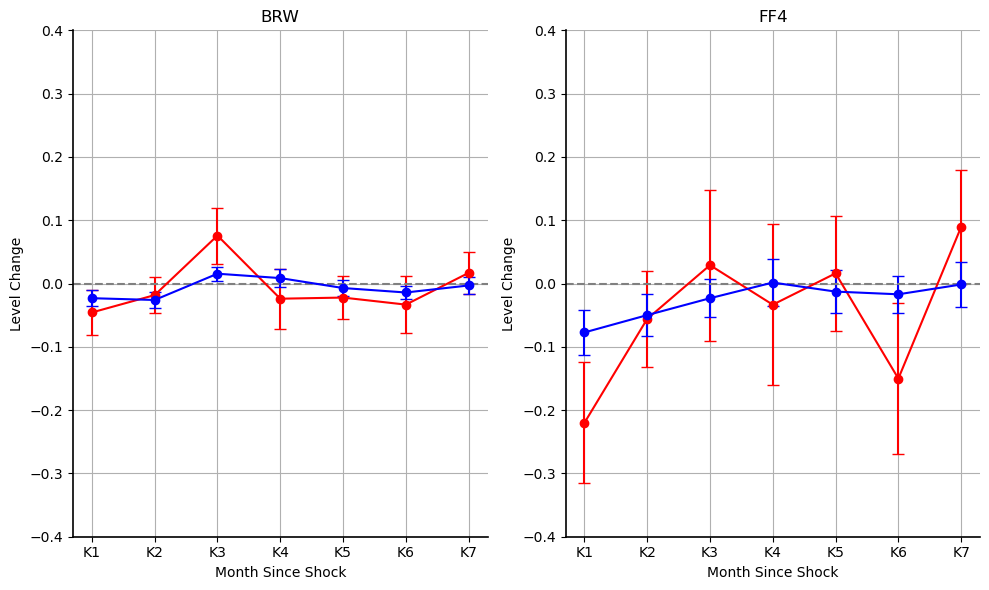

In [44]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(H9_BRW_result_df_c.columns, H9_BRW_result_df_c.loc["Coeff"], yerr=H9_BRW_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].errorbar(H1_BRW_result_df_c.columns, H1_BRW_result_df_c.loc["Coeff"], yerr=H1_BRW_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("BRW")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.4,0.4) 

# Plot for Old Firms
axes[1].errorbar(H9_FF4_result_df_c.columns, H9_FF4_result_df_c.loc["Coeff"], yerr=H9_FF4_result_df_c.loc["95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[1].errorbar(H1_FF4_result_df_c.columns, H1_FF4_result_df_c.loc["Coeff"], yerr=H1_FF4_result_df_c.loc["95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("FF4")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.4,0.4)

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)


plt.tight_layout()
plt.show()


### Plotting Results without control variables

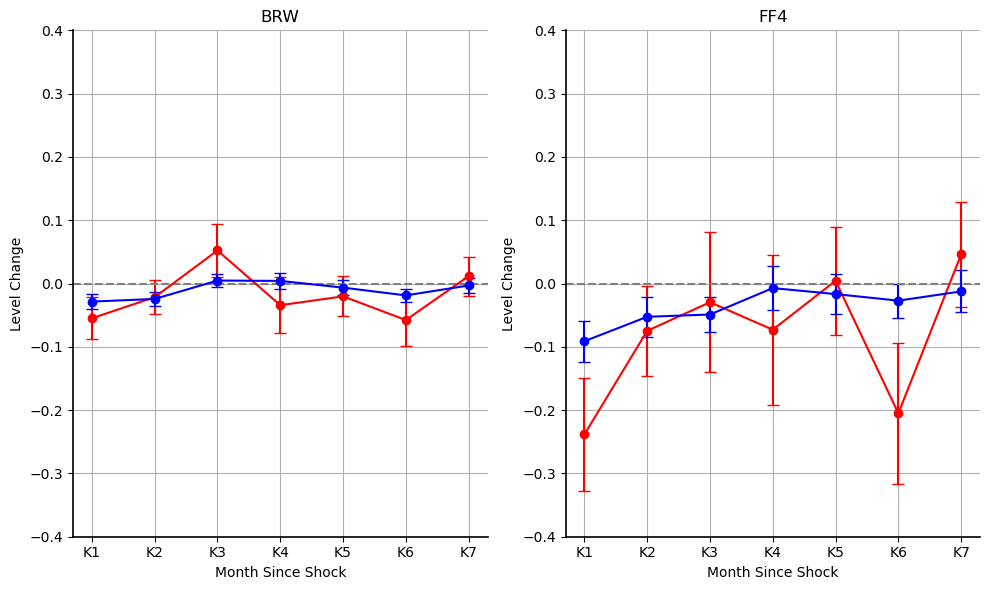

In [45]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(H9_BRW_result_df_nc.columns, H9_BRW_result_df_nc.loc["Coeff"], yerr=H9_BRW_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].errorbar(H1_BRW_result_df_nc.columns, H1_BRW_result_df_nc.loc["Coeff"], yerr=H1_BRW_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("BRW")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.4,0.4) 

# Plot for Old Firms
axes[1].errorbar(H9_FF4_result_df_nc.columns, H9_FF4_result_df_nc.loc["Coeff"], yerr=H9_FF4_result_df_nc.loc["95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[1].errorbar(H1_FF4_result_df_nc.columns, H1_FF4_result_df_nc.loc["Coeff"], yerr=H1_FF4_result_df_nc.loc["95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("FF4")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.4,0.4)

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)


plt.tight_layout()
plt.savefig("Data/Pictures/H9_nc.png")
plt.show()
